# Load USD_TRY Dataset from Excel file

In [2]:
library(readxl)
historicalset <- read_excel("USDTRY_Historical_Data.xlsx", skip = 3, col_types = c("date", "numeric"), col_names = c("Dates","Close_Price"))
head(historicalset,5)
tail(historicalset, 5)
summary(historicalset)

Dates,Close_Price
1997-10-20,0.1808
1997-10-21,0.1813
1997-10-22,0.1820
1997-10-23,0.1818
1997-10-24,0.1826


Dates,Close_Price
2018-11-14,5.4604
2018-11-15,5.3514
2018-11-16,5.3330
2018-11-19,5.3125
2018-11-20,5.3871


     Dates                      Close_Price    
 Min.   :1997-10-20 00:00:00   Min.   :0.1808  
 1st Qu.:2003-02-07 00:00:00   1st Qu.:1.3212  
 Median :2008-05-14 00:00:00   Median :1.5123  
 Mean   :2008-05-12 22:52:28   Mean   :1.7428  
 3rd Qu.:2013-08-15 00:00:00   3rd Qu.:1.9491  
 Max.   :2018-11-20 00:00:00   Max.   :6.8838  

# Create the weekly logReturn series

In [4]:
library(lubridate)
library(quantmod)
data.xts <- xts(historicalset$Close_Price, order.by = as.Date(historicalset$Dates))
weeklydata <- to.weekly(data.xts, name = "W")
head(weeklydata,5)
logReturn <- as.xts(log(weeklydata$W.Close)-log(weeklydata$W.Open))
dimnames(logReturn)[2] <- "LogReturn"
head(logReturn)

           W.Open W.High  W.Low W.Close
1997-10-24 0.1808 0.1826 0.1808  0.1826
1997-10-31 0.1828 0.1828 0.1816  0.1821
1997-11-07 0.1839 0.1840 0.1832  0.1832
1997-11-14 0.1851 0.1875 0.1851  0.1875
1997-11-21 0.1889 0.1911 0.1889  0.1906

              LogReturn
1997-10-24  0.009906520
1997-10-31 -0.003836672
1997-11-07 -0.003813679
1997-11-14  0.012882626
1997-11-21  0.008959217
1997-11-28  0.022751757

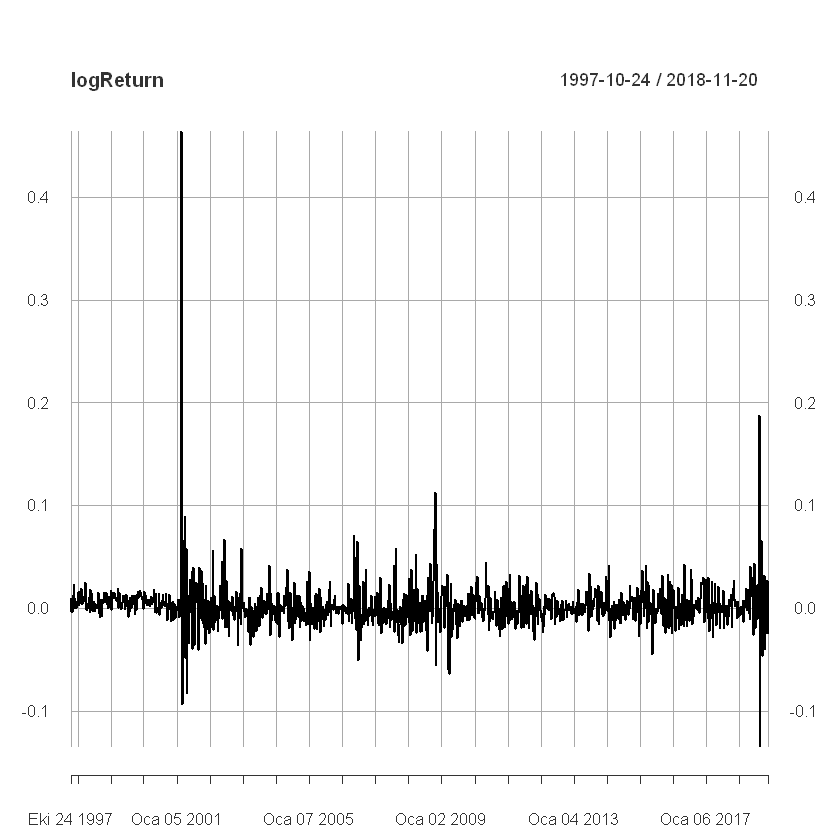

In [5]:
plot(logReturn)

In [16]:
library(tseries)
adf.test(logReturn)

Warning message in adf.test(logReturn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logReturn
Dickey-Fuller = -9.8881, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [6]:
library(forecast)
model <- auto.arima(logReturn)
summary(model)

Series: logReturn 
ARIMA(0,1,3) 

Coefficients:
          ma1     ma2      ma3
      -1.1481  0.2179  -0.0607
s.e.   0.0306  0.0464   0.0283

sigma^2 estimated as 0.0005287:  log likelihood=2579.03
AIC=-5150.07   AICc=-5150.03   BIC=-5130.07

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set -0.0004035339 0.02295048 0.01275464 NaN  Inf 0.6736944 0.001952453



	Shapiro-Wilk normality test

data:  model$residuals
W = 0.64998, p-value < 2.2e-16


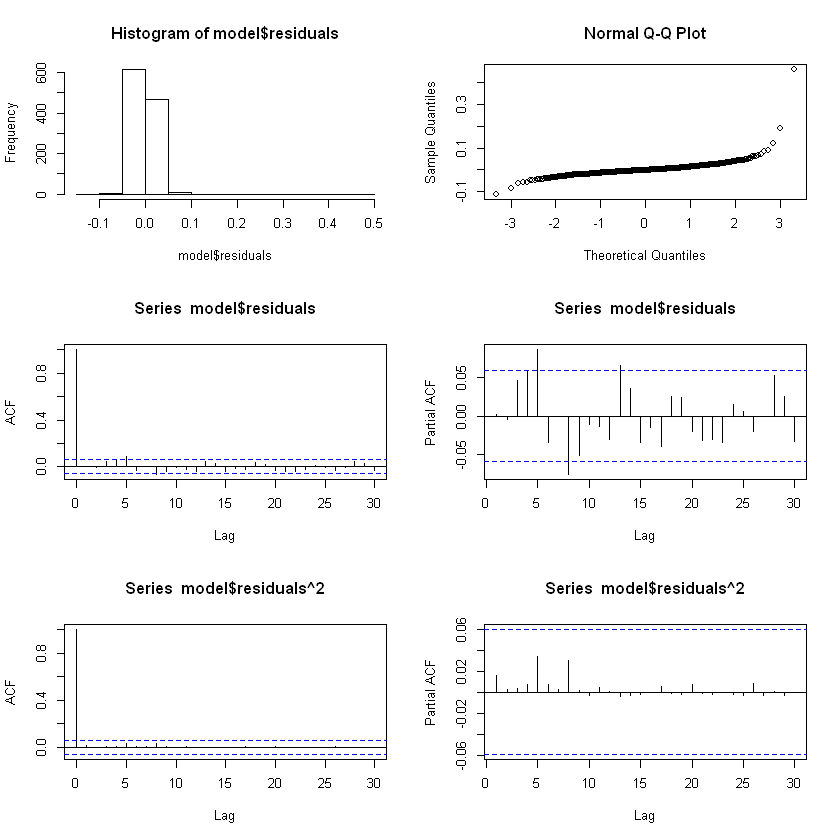

In [12]:
shapiro.test(model$residuals)
par(mfrow=c(3,2))
hist(model$residuals)
qqnorm(model$residuals)
acf(model$residuals)
pacf(model$residuals)
acf(model$residuals^2)
pacf(model$residuals^2)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     4.880043e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.601e+03
     1    7 -3.602e+03  2.17e-04  3.58e-04  2.2e-04  2.6e+09  2.2e-05  4.58e+05
     2    8 -3.602e+03  8.27e-06  9.22e-06  2.2e-04  2.0e+00  2.2e-05  8.08e+00
     3   15 -3.612e+03  2.69e-03  4.37e-03  3.9e-01  2.0e+00  6.5e-02  8.04e+00
     4   18 -3.615e+03  9.28e-04  1.06e-03  6.4e-01  1.8e+00  2.0e-01  5.08e-02
     5   20 -3.616e+03  9.67e-05  1.92e-04  7.2e-02  1.8e+00  3.9e-02  1.86e-03
     6   21 -3.616e+03  2.17e-04  2.48e-04  6.3e-02  1.9e+00  3.9e-02  3.59e-03
     7   23 -3.617e+03  1.87e-04  3.54e-04  1.4e-01  1.4e+00  1.1e-01  1.52e-03
     8   24 -3.618e+03  1.16e-04  6.69e-05  5.7e-02  0.0e+00  4.9e-02  6.69e-05
     9   25 -3.618e+03  1.97e-04  1.56e-04  1.4e-01 


Call:
garch(x = coredata(logReturn))

Coefficient(s):
       a0         a1         b1  
0.0003212  0.2161749  0.2408197  



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1097
 Recursion Init:            mci
 Series Scale:              0.02328577

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V     params includes
    mu     -0.87225153   0.8722515 0.08722515     TRUE
    omega   0.00000100 100.0000000 0.10000000     TRUE
    alpha1  0.00000001   1.0000000 0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 0.10000000    FALSE
    beta1   0.00000001   1.0000000 0.80

Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel parametre değil"Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel para

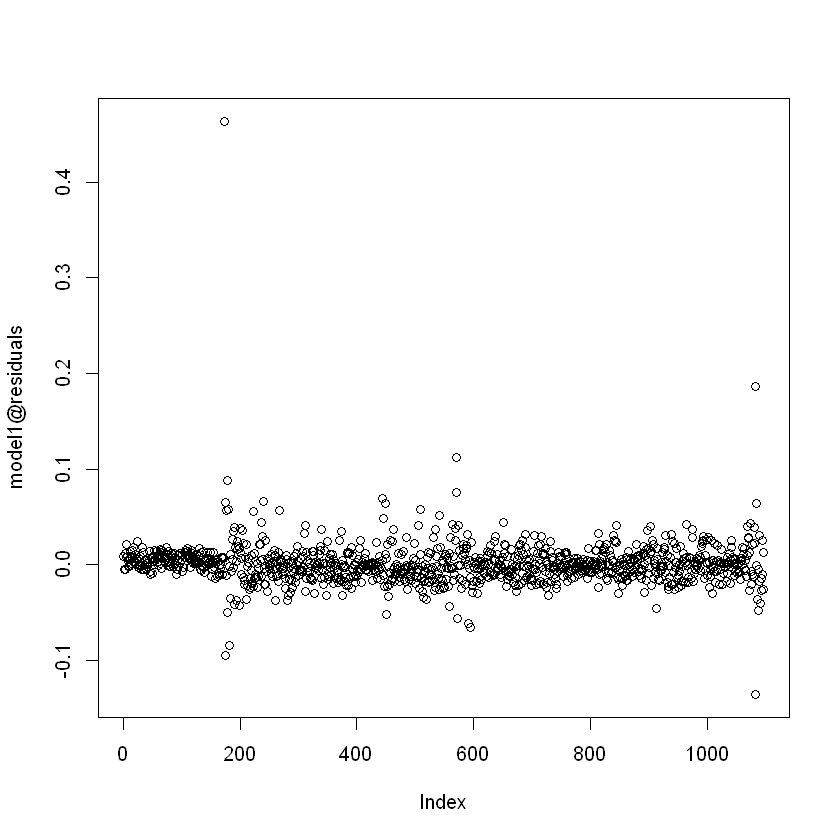

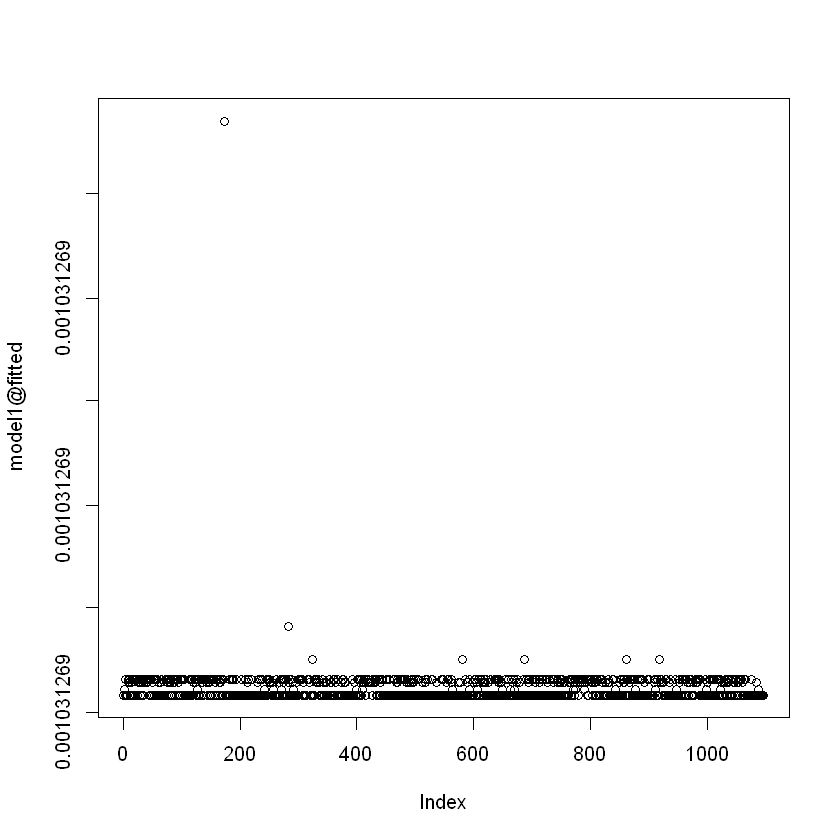

In [17]:
library(fGarch)
garch(coredata(logReturn))
model1 <- garchFit(formula=~garch(1,1), data=coredata(logReturn))
plot(model1@residuals, with ="lines")
plot(model1@fitted, with ="lines")

In [18]:
y = coredata(logReturn)-mean(coredata(logReturn))
Part3.g = garchFit(~garch(1,1), y, include.mean = F )
summary(Part3.g)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1097
 Recursion Init:            mci
 Series Scale:              0.02328577

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                      U           V params includes
    mu     -1.18778e-17 1.18778e-17    0.0    FALSE
    omega   1.00000e-06 1.00000e+02    0.1     TRUE
    alpha1  1.00000e-08 1.00000e+00    0.1     TRUE
    gamma1 -1.00000e+00 1.00000e+00    0.1    FALSE
    beta1   1.00000e-08 1.00000e+00    0.8     TRUE
  

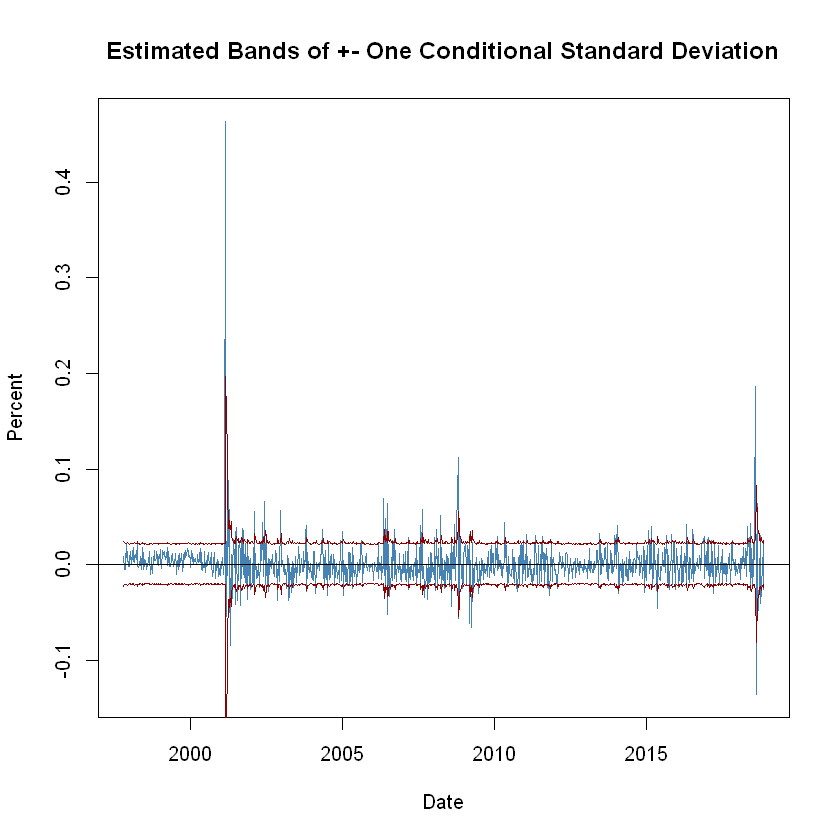

In [30]:
GARCH_Log <- garchFit(data = coredata(logReturn), trace = F)
dev_mean <- coredata(logReturn)- GARCH_Log@fit$coef[1]
plot(index(logReturn), dev_mean, 
     type = "l", 
     col = "steelblue",
     ylab = "Percent", 
     xlab = "Date",
     main = "Estimated Bands of +- One Conditional Standard Deviation",
     lwd = 0.2)
# add horizontal line at y = 0
abline(0, 0)

# add GARCH(1,1) confidence bands (one standard deviation) to the plot
lines(index(logReturn), 
      GARCH_Log@fit$coef[1] + GARCH_Log@sigma.t, 
      col = "darkred", 
      lwd = 0.5)

lines(index(logReturn), 
      GARCH_Log@fit$coef[1] - GARCH_Log@sigma.t, 
      col = "darkred", 
      lwd = 0.5)

# Before After 

In [37]:
befcris <- window(logReturn, start="1997-10-24", end ="2000-10-01")
aftcris <- window(logReturn, start="2001-05-01", end ="2018-11-20")
#outcris <- merge(befcris, aftcris)
outcris <- rbind(befcris,aftcris)
dim(outcris)

[1] 1068    1

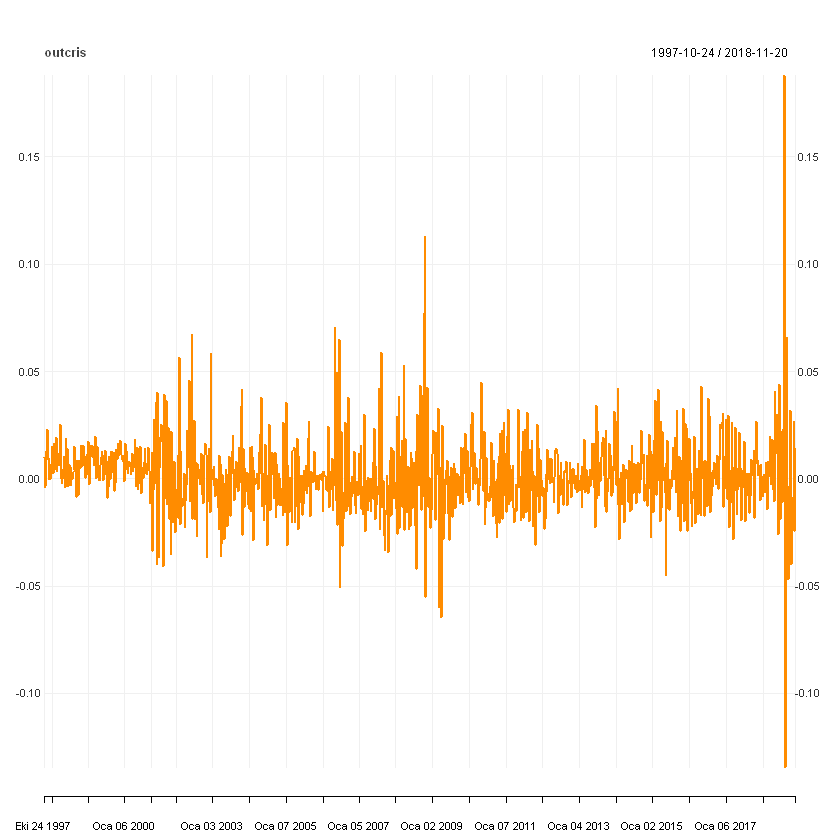

In [39]:
chart_Series(outcris)

In [40]:
adf.test(outcris)

Warning message in adf.test(outcris):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  outcris
Dickey-Fuller = -9.0891, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [41]:
modelout <- auto.arima(outcris)
summary(modelout)

Series: outcris 
ARIMA(3,0,1) with non-zero mean 

Coefficients:
         ar1     ar2     ar3      ma1    mean
      0.3802  0.0323  0.1355  -0.4778  0.0016
s.e.  0.1488  0.0347  0.0314   0.1490  0.0006

sigma^2 estimated as 0.0003126:  log likelihood=2796.75
AIC=-5581.49   AICc=-5581.41   BIC=-5551.65

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE
Training set -1.297876e-06 0.01763889 0.01216073 NaN  Inf 0.6915276
                     ACF1
Training set -0.001238214



	Shapiro-Wilk normality test

data:  modelout$residuals
W = 0.89583, p-value < 2.2e-16


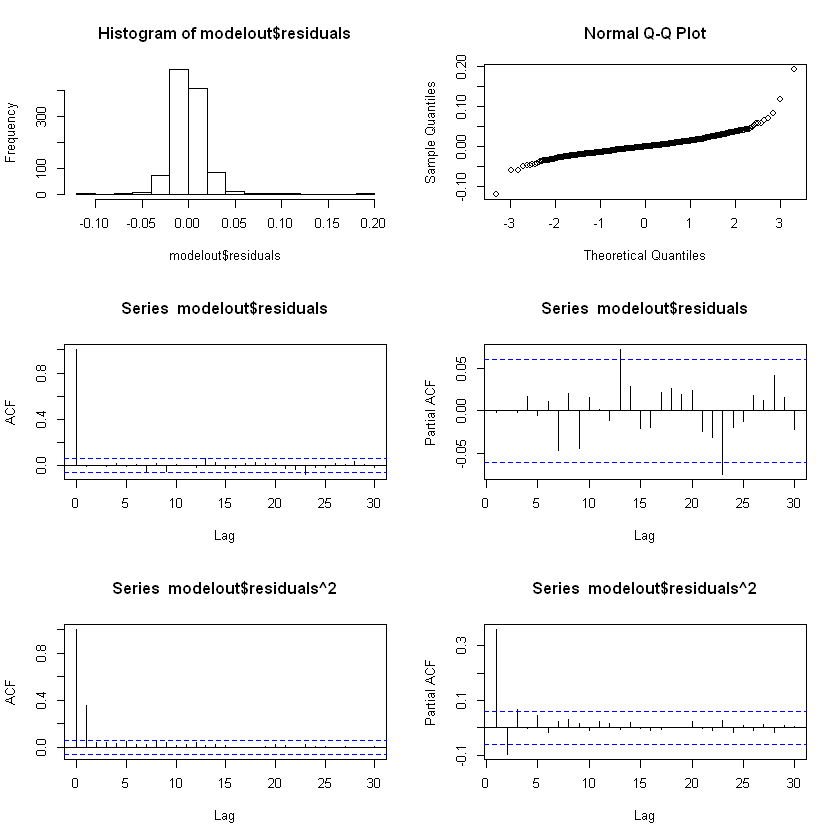

In [42]:
shapiro.test(modelout$residuals)
par(mfrow=c(3,2))
hist(modelout$residuals)
qqnorm(modelout$residuals)
acf(modelout$residuals)
pacf(modelout$residuals)
acf(modelout$residuals^2)
pacf(modelout$residuals^2)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.885019e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.807e+03
     1    7 -3.811e+03  1.17e-03  1.76e-03  3.0e-04  7.2e+09  3.0e-05  6.36e+06
     2    8 -3.812e+03  7.19e-05  1.04e-04  2.8e-04  2.0e+00  3.0e-05  3.88e+01
     3    9 -3.812e+03  1.31e-05  1.38e-05  3.0e-04  2.0e+00  3.0e-05  3.82e+01
     4   16 -3.842e+03  7.82e-03  1.29e-02  4.8e-01  2.0e+00  9.2e-02  3.79e+01
     5   19 -3.859e+03  4.61e-03  4.98e-03  6.4e-01  2.0e+00  2.0e-01  1.00e+00
     6   21 -3.862e+03  6.77e-04  9.30e-04  7.2e-02  2.0e+00  3.9e-02  3.19e-01
     7   24 -3.877e+03  3.77e-03  3.50e-03  2.1e-01  2.0e+00  1.5e-01  7.02e-01
     8   26 -3.879e+03  7.09e-04  7.20e-04  3.3e-02  2.0e+00  3.1e-02  9.92e+00
     9   28 -3.894e+03  3.81e-03  5.98e-03  2.0e-01 


Call:
garch(x = coredata(outcris))

Coefficient(s):
       a0         a1         b1  
2.827e-05  2.770e-01  6.615e-01  



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1068
 Recursion Init:            mci
 Series Scale:              0.01790412

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V     params includes
    mu     -0.89050052   0.8905005 0.08905005     TRUE
    omega   0.00000100 100.0000000 0.10000000     TRUE
    alpha1  0.00000001   1.0000000 0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 0.10000000    FALSE
    beta1   0.00000001   1.0000000 0.80

Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel parametre değil"Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel para

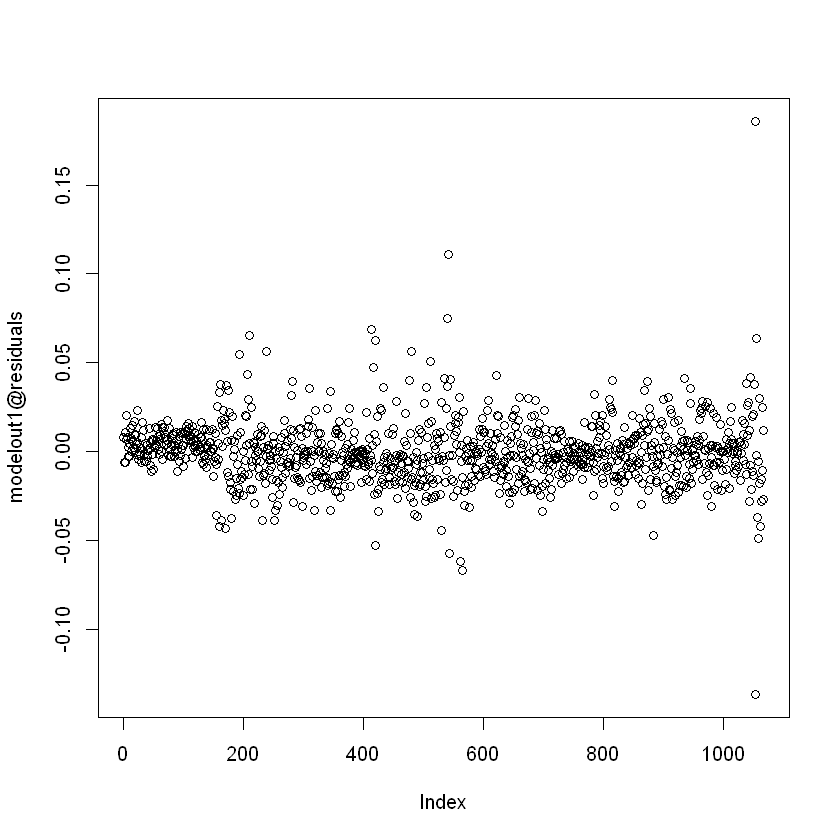

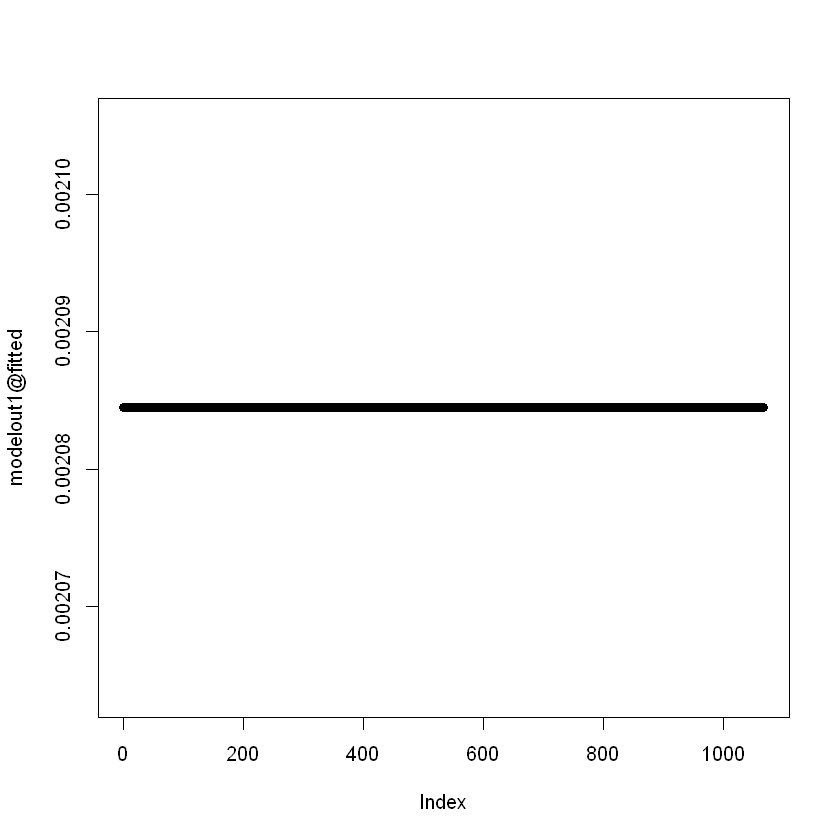

In [43]:
library(fGarch)
garch(coredata(outcris))
modelout1 <- garchFit(formula=~garch(1,1), data=coredata(outcris))
plot(modelout1@residuals, with ="lines")
plot(modelout1@fitted, with ="lines")

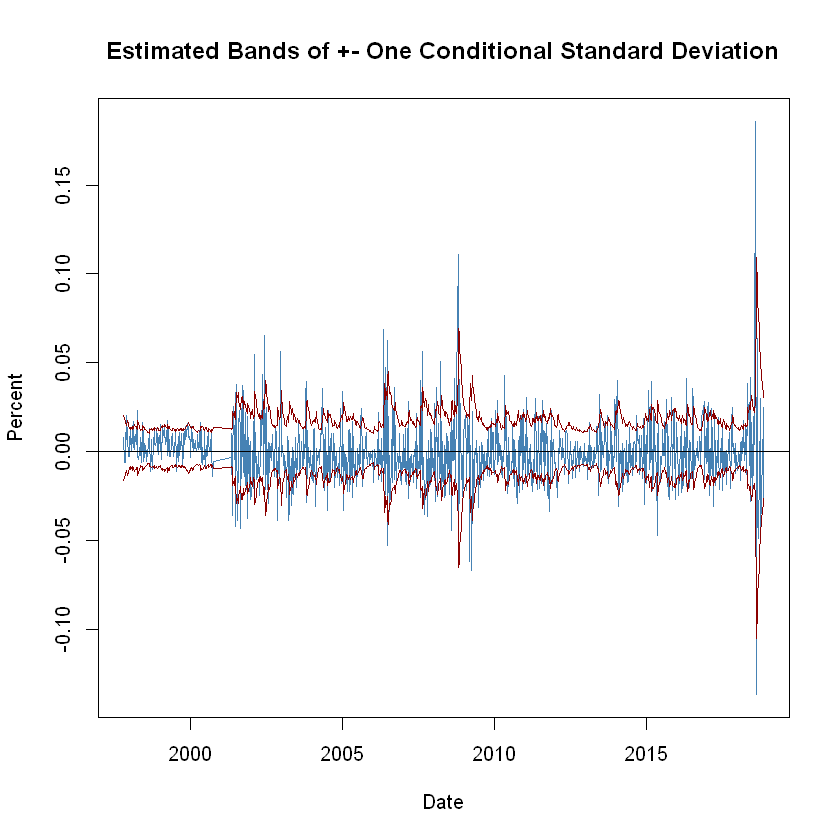

In [44]:
GARCH_Log <- garchFit(data = coredata(outcris), trace = F)
dev_mean <- coredata(outcris)- GARCH_Log@fit$coef[1]
plot(index(outcris), dev_mean, 
     type = "l", 
     col = "steelblue",
     ylab = "Percent", 
     xlab = "Date",
     main = "Estimated Bands of +- One Conditional Standard Deviation",
     lwd = 0.2)
# add horizontal line at y = 0
abline(0, 0)

# add GARCH(1,1) confidence bands (one standard deviation) to the plot
lines(index(outcris), 
      GARCH_Log@fit$coef[1] + GARCH_Log@sigma.t, 
      col = "darkred", 
      lwd = 0.5)

lines(index(outcris), 
      GARCH_Log@fit$coef[1] - GARCH_Log@sigma.t, 
      col = "darkred", 
      lwd = 0.5)

# Split into 3 parts all data 

In [7]:
Part1 <- window(logReturn, start= "1997-10-24", end ="2000-10-30")
Part2 <- window(logReturn, start= "2000-10-30", end ="2009-12-31")
Part3 <- window(logReturn, start= "2010-01-01", end ="2018-07-20")
logPart1 <-log(1+Part1)
logPart2 <-log(1+Part2)
logPart3 <-log(1+Part3)

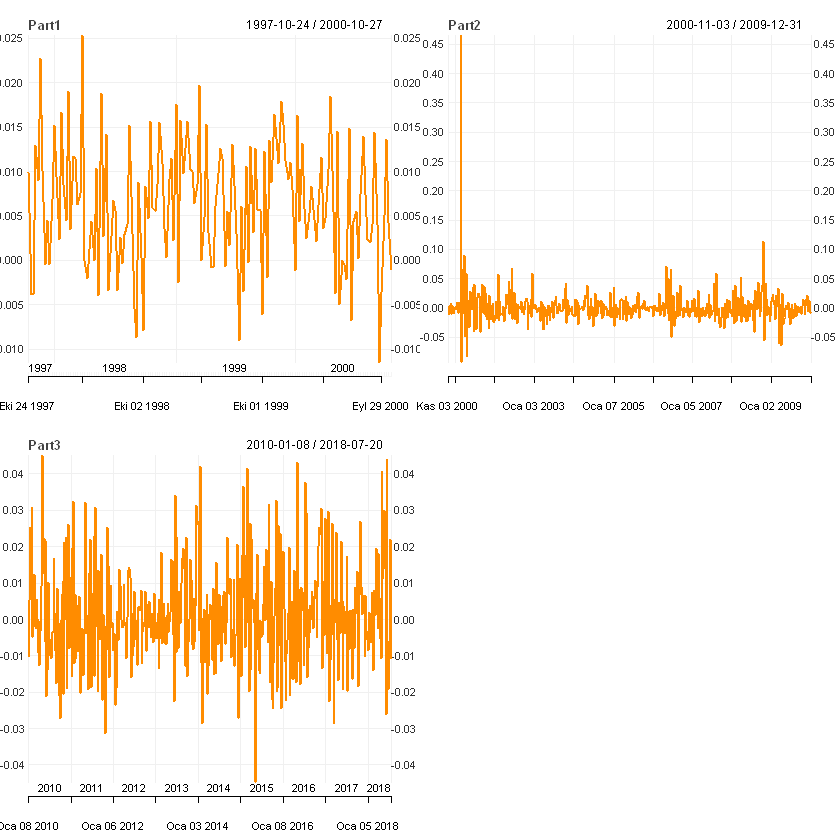

In [8]:
par(mfrow=c(2,2))
chart_Series(Part1)
chart_Series(Part2)
chart_Series(Part3)

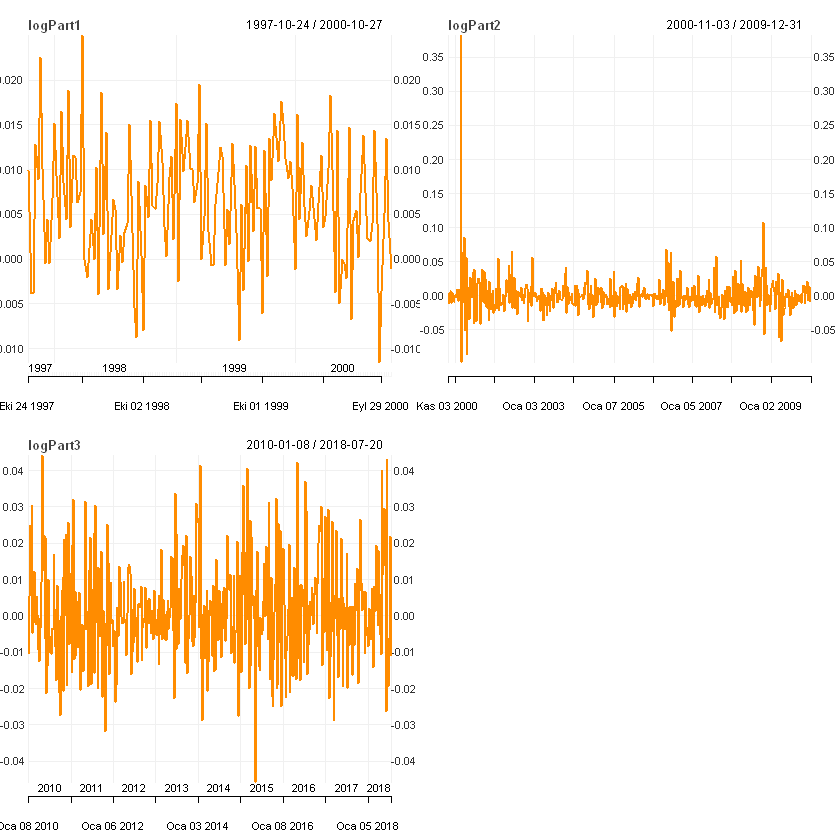

In [9]:
par(mfrow=c(2,2))
chart_Series(logPart1)
chart_Series(logPart2)
chart_Series(logPart3)

# To test our datasets whether to be stationary or not 

Generally, a p-value of less than 0.05 means you can reject the null hypothesis that there is a unit root of a univariate time series ( non-stationary time series ). And You can accept the alternative hypothesis that  the time series is stationary. The ADF statistic is negative number. If the test statistic of adf.test is more negative than the its table value, we can reject the null hypothesis. The more negative test statistic means that there is  the stronger the evidence for rejecting the null hypothesis. 

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/06/df-critical.png">
The table is taken from the website https://www.statisticshowto.datasciencecentral.com/adf-augmented-dickey-fuller-test/

In [10]:
library(tseries)
adf.test(Part1)
adf.test(Part2)
adf.test(Part3)
adf.test(logPart1)
adf.test(logPart2)
adf.test(logPart3)

Warning message:
"package 'tseries' was built under R version 3.5.2"


	Augmented Dickey-Fuller Test

data:  Part1
Dickey-Fuller = -3.849, Lag order = 5, p-value = 0.01846
alternative hypothesis: stationary


Warning message in adf.test(Part2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Part2
Dickey-Fuller = -7.5361, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(Part3):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Part3
Dickey-Fuller = -7.2207, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  logPart1
Dickey-Fuller = -3.8485, Lag order = 5, p-value = 0.01848
alternative hypothesis: stationary


Warning message in adf.test(logPart2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logPart2
Dickey-Fuller = -7.5865, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(logPart3):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logPart3
Dickey-Fuller = -7.2186, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


In [11]:
dim(Part1);dim(Part2);dim(Part3)

[1] 156   1

[1] 477   1

[1] 446   1

- For the Part1 dataset, The test statistic is -3.849 which less than the value of table with the p-value 0.018. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.
- For the Part2 dataset, The test statistic is -7.5361 with the p-value less than 0.01. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.
- For the Part3 dataset, The test statistic is -7.2207 with the p-value less than 0.01. This means that There is an enough evidence to reject the null hypothesis, and so We can accept the our dataset is **stationary**.

# ARIMA model for the Part's

We will created the ARIMA model for each case to define deterministic part of our datasets.

In [12]:
library(forecast)
Model1 <- auto.arima(Part1)
Model2 <- auto.arima(Part2)
Model3 <- auto.arima(Part3)
summary(Model1)
summary(Model2)
summary(Model3)
Model1log <- auto.arima(logPart1)
Model2log <- auto.arima(logPart2)
Model3log <- auto.arima(logPart3)
summary(Model1log)
summary(Model2log)
summary(Model3log)

Series: Part1 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      0.0064
s.e.  0.0006

sigma^2 estimated as 4.842e-05:  log likelihood=554.12
AIC=-1104.23   AICc=-1104.15   BIC=-1098.13

Training set error measures:
                       ME        RMSE         MAE  MPE MAPE      MASE      ACF1
Training set 2.057467e-18 0.006936449 0.005659155 -Inf  Inf 0.7048782 0.0129284
Series: Part2 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.1558  -0.5156  -1.3168  0.7290
s.e.  0.1176   0.1277   0.0944  0.1035

sigma^2 estimated as 0.0008454:  log likelihood=1012.61
AIC=-2015.21   AICc=-2015.08   BIC=-1994.37

Training set error measures:
                       ME      RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.0007971769 0.0289535 0.01487014 NaN  Inf 0.6197023 -0.03299916
Series: Part3 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      0.0017
s.e.  0.0007

sigma^2 estimated as 0.0002027:  log likel

For the each stage, The best ARIMA model with order p, d and q is decided with respect to the value of AIC, AICc and BIC. Consider, for example, the second part with the best ARIMA(2,0,2). This model uses autoregressive regression with order 2 and moving average with order 2. 

# What is the distribution of Residuls of the Parts

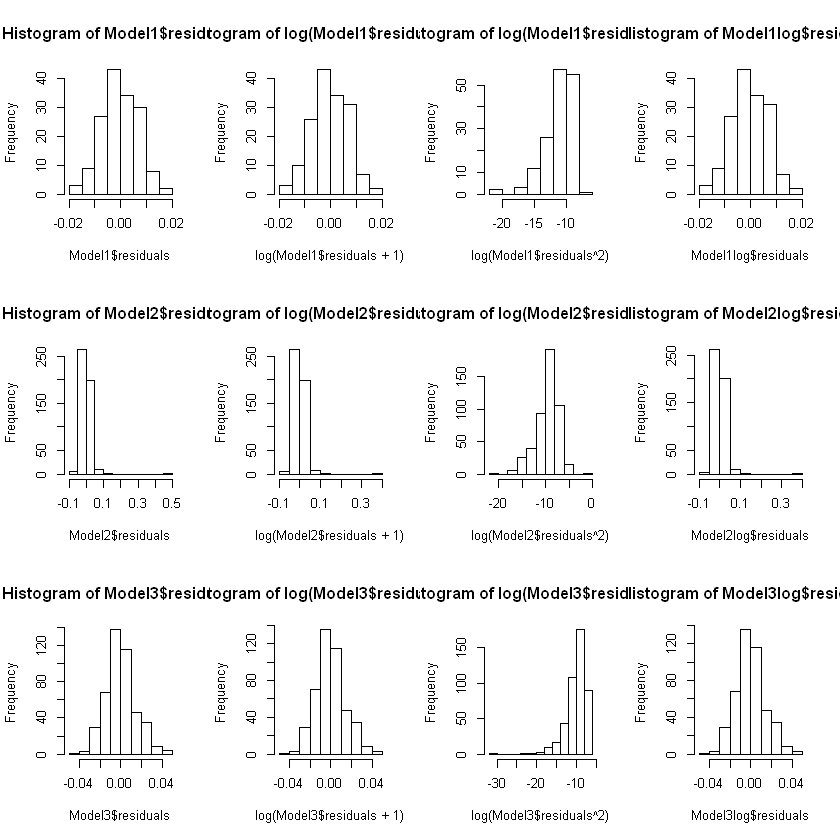

In [13]:
par(mfrow=c(3,4))
hist(Model1$residuals)
hist(log(Model1$residuals+1))
hist(log(Model1$residuals^2))
hist(Model1log$residuals)

hist(Model2$residuals)
hist(log(Model2$residuals+1))
hist(log(Model2$residuals^2))
hist(Model2log$residuals)

hist(Model3$residuals)
hist(log(Model3$residuals+1))
hist(log(Model3$residuals^2))
hist(Model3log$residuals)


# To test normality Shapiro.test()

The Shapiro-Wilk test is a test of normality with the null hypothesis is that the data came from a normally distributed population.

**Properties of the test statistic W ** 

The value of test statistic W is between 0 and 1. W is a very similar to the correlation coefficient of a normal probability plot. 
* If p value greater than 0.05 then we have failure to reject the null hypothesis that is **not proof* that the distribution is Normal. It means that the data does not give enough evidence to reject the assumption of normality

**Kolmogorov-Smirnov test**

The Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution, or to compare two samples.

The D statistic is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution.

In [178]:
ks.test(Model2$residuals,Model3$residuals)

Warning message in ks.test(Model2$residuals, Model3$residuals):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  Model2$residuals and Model3$residuals
D = 0.075688, p-value = 0.1426
alternative hypothesis: two-sided


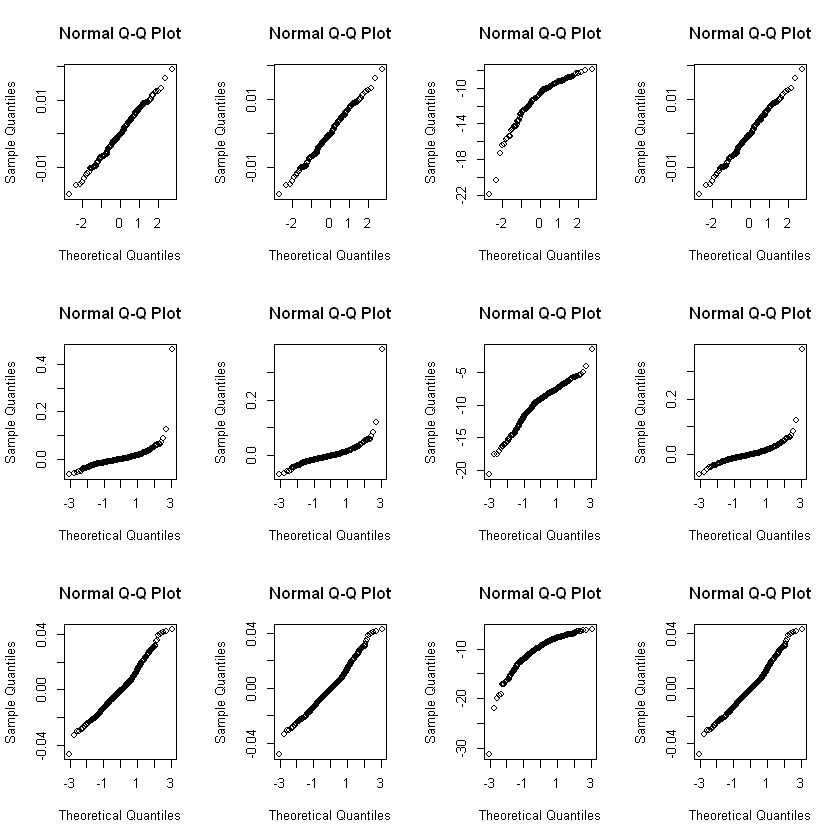

In [14]:
par(mfrow=c(3,4))
qqnorm(Model1$residuals)
qqnorm(log(Model1$residuals+1))
qqnorm(log(Model1$residuals^2))
qqnorm(Model1log$residuals)

qqnorm(Model2$residuals)
qqnorm(log(Model2$residuals+1))
qqnorm(log(Model2$residuals^2))
qqnorm(Model2log$residuals)

qqnorm(Model3$residuals)
qqnorm(log(Model3$residuals+1))
qqnorm(log(Model3$residuals^2))
qqnorm(Model3log$residuals)


In [17]:
shapiro.test(Model1$residuals)
shapiro.test(log(Model1$residuals+1))
shapiro.test(log(Model1$residuals^2))
shapiro.test(Model1log$residuals)
shapiro.test(log(Model1log$residuals+1))

shapiro.test(Model2$residuals)
shapiro.test(log(Model2$residuals+1))
shapiro.test(log(Model2$residuals^2))
shapiro.test(Model2log$residuals)
shapiro.test(log(Model2log$residuals+1))

shapiro.test(Model3$residuals)
shapiro.test(log(Model3$residuals+1))
shapiro.test(log(Model3$residuals^2))
shapiro.test(Model3log$residuals)
shapiro.test(log(Model3log$residuals+1))


	Shapiro-Wilk normality test

data:  Model1$residuals
W = 0.99576, p-value = 0.9367



	Shapiro-Wilk normality test

data:  log(Model1$residuals + 1)
W = 0.9957, p-value = 0.9326



	Shapiro-Wilk normality test

data:  log(Model1$residuals^2)
W = 0.86986, p-value = 2.055e-10



	Shapiro-Wilk normality test

data:  Model1log$residuals
W = 0.9957, p-value = 0.9326



	Shapiro-Wilk normality test

data:  log(Model1log$residuals + 1)
W = 0.9956, p-value = 0.9259



	Shapiro-Wilk normality test

data:  Model2$residuals
W = 0.57069, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  log(Model2$residuals + 1)
W = 0.65765, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  log(Model2$residuals^2)
W = 0.94912, p-value = 9.698e-12



	Shapiro-Wilk normality test

data:  Model2log$residuals
W = 0.65799, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  log(Model2log$residuals + 1)
W = 0.72625, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Model3$residuals
W = 0.98654, p-value = 0.0003825



	Shapiro-Wilk normality test

data:  log(Model3$residuals + 1)
W = 0.98833, p-value = 0.001245



	Shapiro-Wilk normality test

data:  log(Model3$residuals^2)
W = 0.85139, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Model3log$residuals
W = 0.98833, p-value = 0.001243



	Shapiro-Wilk normality test

data:  log(Model3log$residuals + 1)
W = 0.98989, p-value = 0.003663


 # Is there  difference between the variance of each Part ?

In [106]:
var.test(log(abs(Model2$residuals)), log(abs(Model3$residuals)))
var.test(log(Model2$residuals^2), log(Model3$residuals^2))


	F test to compare two variances

data:  log(abs(Model2$residuals)) and log(abs(Model3$residuals))
F = 0.89449, num df = 476, denom df = 445, p-value = 0.2315
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.744692 1.073810
sample estimates:
ratio of variances 
         0.8944912 



	F test to compare two variances

data:  log(Model2$residuals^2) and log(Model3$residuals^2)
F = 0.89449, num df = 476, denom df = 445, p-value = 0.2315
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.744692 1.073810
sample estimates:
ratio of variances 
         0.8944912 


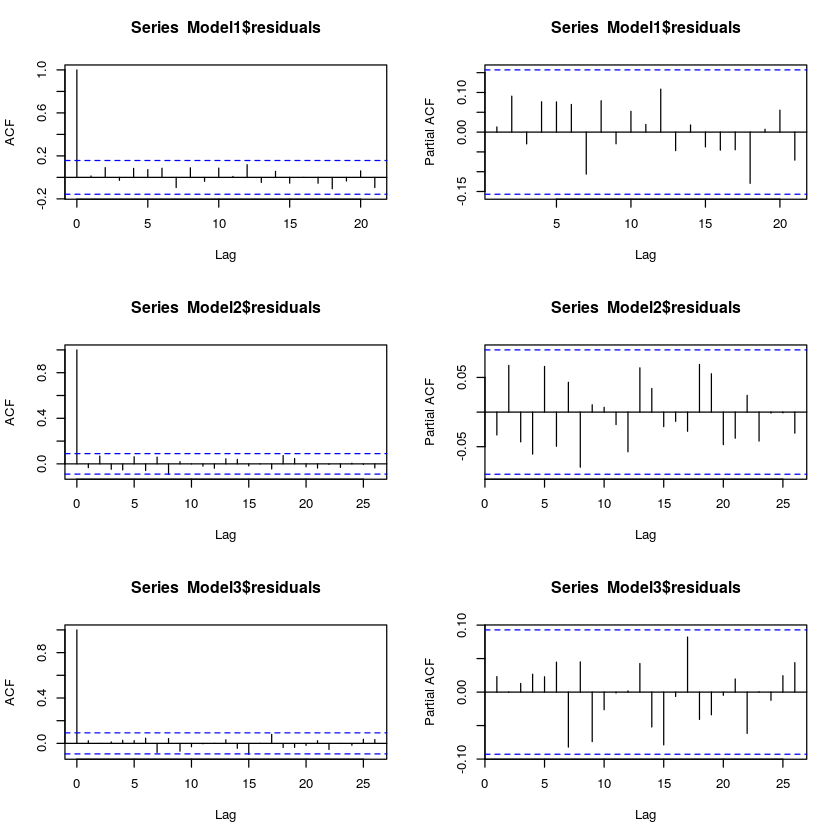

In [14]:
par(mfrow=c(3,2))
acf(Model1$residuals)
pacf(Model1$residuals)
acf(Model2$residuals)
pacf(Model2$residuals)
acf(Model3$residuals)
pacf(Model3$residuals)

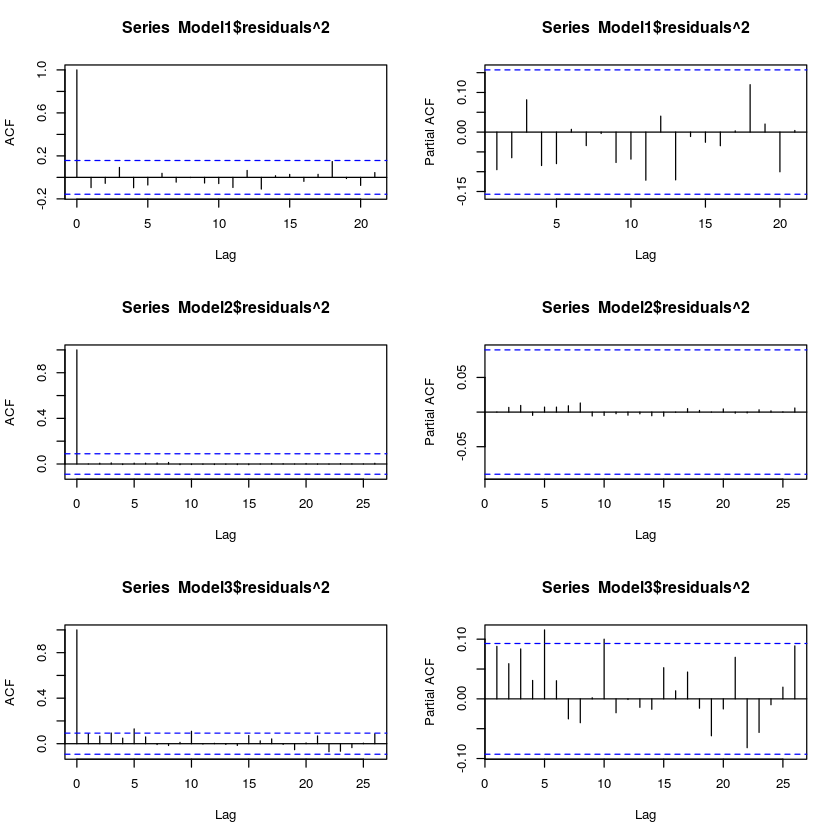

In [15]:
par(mfrow=c(3,2))
acf(Model1$residuals^2)
pacf(Model1$residuals^2)
acf(Model2$residuals^2)
pacf(Model2$residuals^2)
acf(Model3$residuals^2)
pacf(Model3$residuals^2)

In [18]:
#g1 <- garch(Part1, order =c(1,1))
install.packages("MTS")
library(MTS)
archTest(coredata(Part1))
archTest(coredata(Part2))
archTest(coredata(Part3))

also installing the dependencies ‘gss’, ‘stabledist’, ‘timeSeries’, ‘fBasics’, ‘fastICA’, ‘fGarch’, ‘mvtnorm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘MTS’

The following object is masked from ‘package:TTR’:

    VMA



Q(m) of squared series(LM test):  
Test statistic:  8.581421  p-value:  0.5722342 
Rank-based Test:  
Test statistic:  6.307731  p-value:  0.7887804 
Q(m) of squared series(LM test):  
Test statistic:  1.806788  p-value:  0.9976179 
Rank-based Test:  
Test statistic:  63.22956  p-value:  8.828113e-10 
Q(m) of squared series(LM test):  
Test statistic:  26.94937  p-value:  0.002652799 
Rank-based Test:  
Test statistic:  28.76492  p-value:  0.001360007 



 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.824620e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.669e+03
     1    9 -1.669e+03  2.35e-07  4.94e-07  3.6e-06  6.2e+09  3.6e-07  1.53e+03
     2   19 -1.671e+03  1.09e-03  1.55e-03  4.3e-01  2.0e+00  7.7e-02  3.42e-01
     3   22 -1.673e+03  1.46e-03  1.52e-03  7.3e-01  1.3e+00  3.1e-01  2.20e-02
     4   24 -1.674e+03  3.24e-04  4.30e-04  7.8e-02  1.9e+00  6.1e-02  6.70e-03
     5   27 -1.675e+03  8.61e-04  1.04e-03  2.3e-01  1.1e+00  2.4e-01  6.23e-03
     6   28 -1.676e+03  4.46e-04  3.10e-04  7.7e-02  0.0e+00  1.2e-01  3.10e-04
     7   29 -1.677e+03  8.24e-04  1.06e-03  5.2e-02  1.1e+00  1.2e-01  2.97e-03
     8   36 -1.677e+03  1.82e-05  3.18e-05  2.3e-07  1.5e+01  4.0e-07  4.80e-04
     9   41 -1.677e+03  7.25e-08  1.16e-07  6.0e-05 


Call:
garch(x = coredata(Part3))

Coefficient(s):
       a0         a1         b1  
9.422e-06  1.036e-01  8.559e-01  



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          446
 Recursion Init:            mci
 Series Scale:              0.01423852

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U          V    params includes
    mu     -1.19352175   1.193522 0.1193522     TRUE
    omega   0.00000100 100.000000 0.1000000     TRUE
    alpha1  0.00000001   1.000000 0.1000000     TRUE
    gamma1 -0.99999999   1.000000 0.1000000    FALSE
    beta1   0.00000001   1.000000 0.8000000     TR

Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel parametre değil"Warning message in plot.window(...):
""with" bir grafiksel parametre değil"Warning message in plot.xy(xy, type, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in axis(side = side, at = at, labels = labels, ...):
""with" bir grafiksel parametre değil"Warning message in box(...):
""with" bir grafiksel parametre değil"Warning message in title(...):
""with" bir grafiksel para

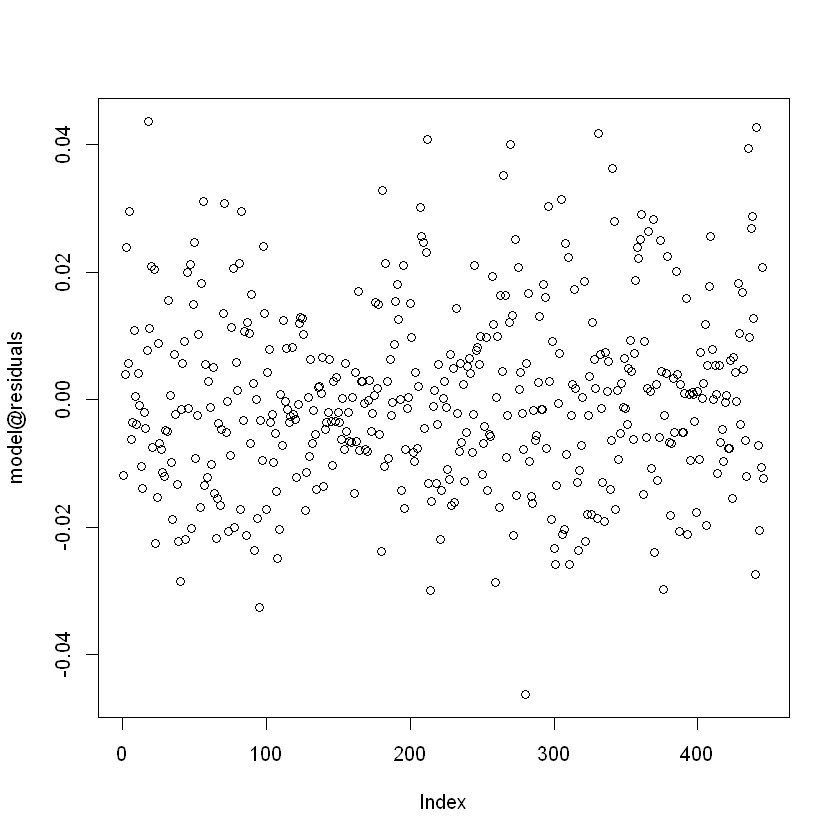

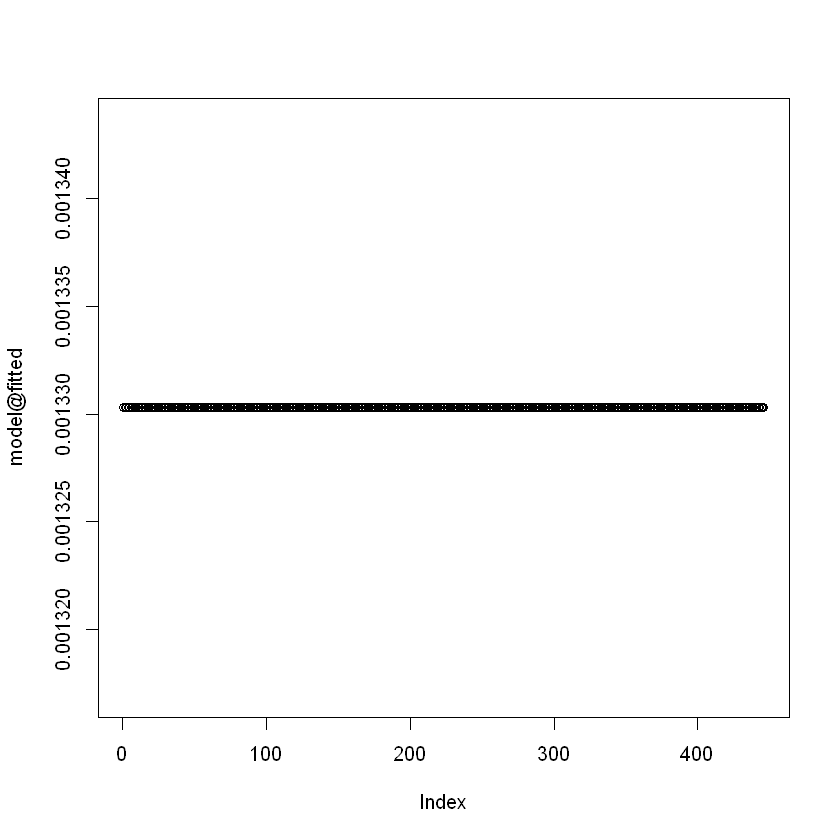

In [19]:
library(fGarch)
garch(coredata(Part3))
model <- garchFit(formula=~garch(1,1), data=coredata(Part3))
plot(model@residuals, with ="lines")
plot(model@fitted, with ="lines")

In [20]:
y = coredata(Part3)-mean(coredata(Part3))
Part3.g = garchFit(~garch(1,1), y, include.mean = F )
summary(Part3.g)


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          446
 Recursion Init:            mci
 Series Scale:              0.01423852

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -1.093294e-16 1.093294e-16    0.0    FALSE
    omega   1.000000e-06 1.000000e+02    0.1     TRUE
    alpha1  1.000000e-08 1.000000e+00    0.1     TRUE
    gamma1 -1.000000e+00 1.000000e+00    0.1    FALSE
    beta1   1.000000e-08 1.000000e+00    0.8 


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     4.358227e-05     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -6.287e+02
     1   15 -6.388e+02  1.58e-02  1.74e-01  8.4e-04  1.6e+10  8.4e-05  1.38e+09
     2   22 -6.417e+02  4.63e-03  3.18e-03  4.6e-01  2.0e+00  4.3e-02  3.03e-01
     3   27 -6.437e+02  3.01e-03  3.12e-03  2.5e-04  9.1e+00  1.2e-05  3.55e-01
     4   28 -6.455e+02  2.79e-03  3.94e-03  4.9e-04  3.0e+00  2.4e-05  2.09e-01
     5   29 -6.455e+02  2.11e-05  4.64e-05  4.8e-04  2.0e+00  2.4e-05  1.27e-01
     6   30 -6.455e+02  9.01e-06  8.70e-06  4.9e-04  2.0e+00  2.4e-05  1.29e-01
     7   37 -6.458e+02  4.47e-04  4.63e-04  7.1e-01  2.0e+00  2.4e-02  1.29e-01
     8   42 -6.458e+02  1.36e-07  1.28e-07  1.2e-04  2.0e+00  4.9e-06  2.72e-03
     9   44 -6.458e+02  7.55e-08  7.62e-08  1.2e-04 

Warning message in garch(coredata(Part1)):
“singular information”


Call:
garch(x = coredata(Part1))

Coefficient(s):
       a0         a1         b1  
8.683e-05  7.392e-09  1.868e-02  



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          156
 Recursion Init:            mci
 Series Scale:              0.006958789

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U          V    params includes
    mu     -9.13653467   9.136535 0.9136535     TRUE
    omega   0.00000100 100.000000 0.1000000     TRUE
    alpha1  0.00000001   1.000000 0.1000000     TRUE
    gamma1 -0.99999999   1.000000 0.1000000    FALSE
    beta1   0.00000001   1.000000 0.8000000     T

Warning message in plot.window(...):
“"with" bir grafiksel parametre değil”Warning message in plot.xy(xy, type, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in box(...):
“"with" bir grafiksel parametre değil”Warning message in title(...):
“"with" bir grafiksel parametre değil”Warning message in plot.window(...):
“"with" bir grafiksel parametre değil”Warning message in plot.xy(xy, type, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in box(...):
“"with" bir grafiksel parametre değil”Warning message in title(...):
“"with" bir grafiksel para

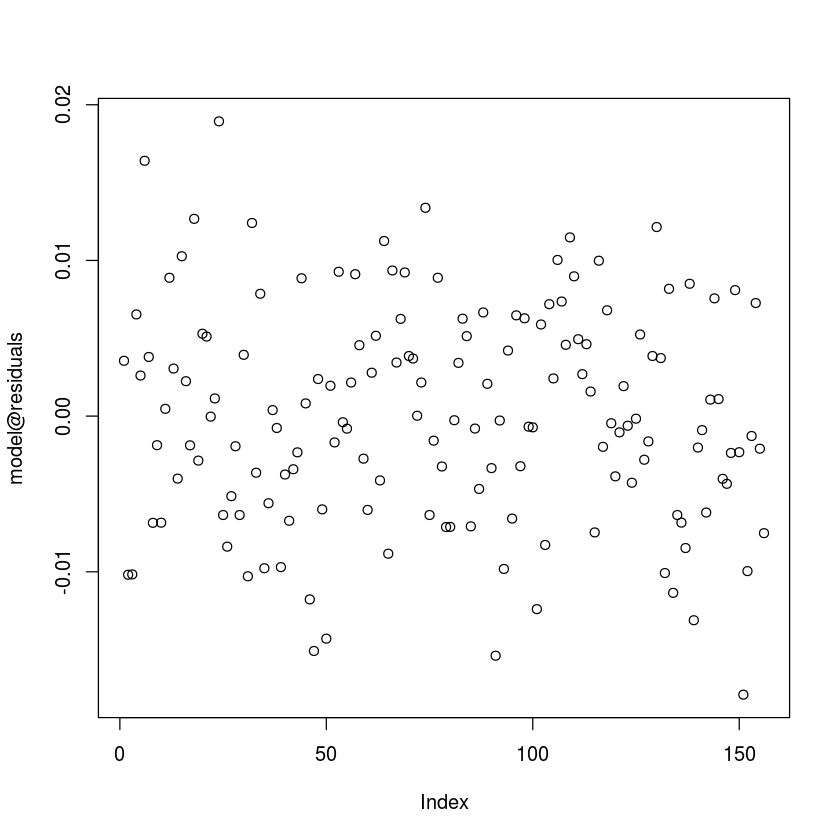

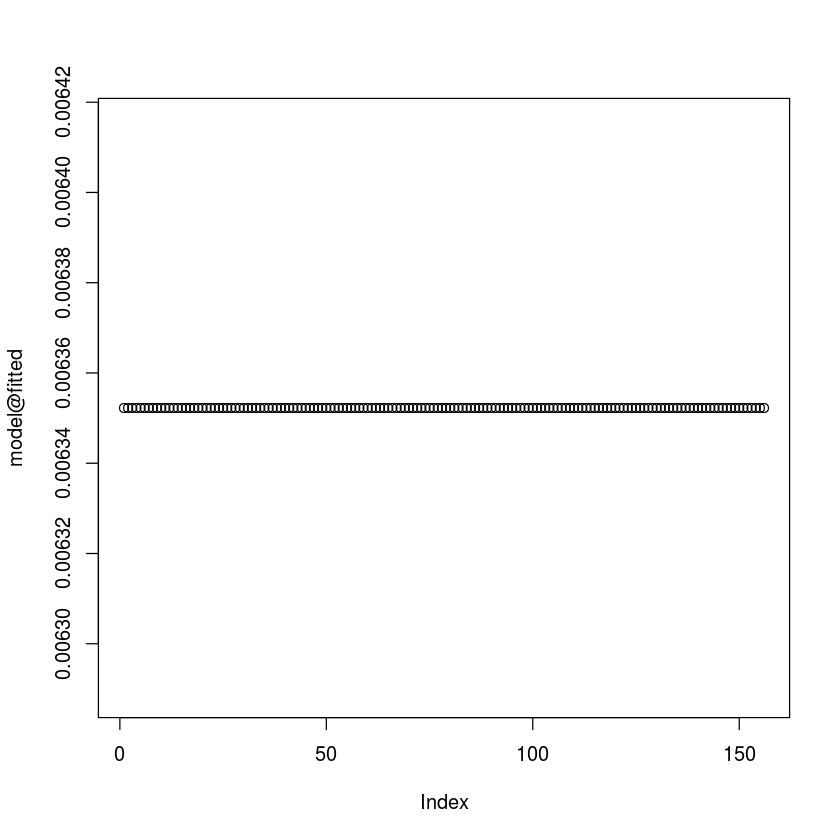

In [44]:
garch(coredata(Part1))
model <- garchFit(formula=~garch(1,1), data=coredata(Part1))
plot(model@residuals, with ="lines")
plot(model@fitted, with ="lines")


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     8.027125e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.439e+03
     1    7 -1.439e+03  5.57e-06  1.79e-05  1.0e-04  2.6e+08  1.0e-05  2.31e+03
     2    8 -1.439e+03  1.10e-06  1.06e-06  9.6e-05  2.0e+00  1.0e-05  2.50e-01
     3   15 -1.440e+03  3.51e-04  6.13e-04  2.5e-01  2.0e+00  3.3e-02  2.49e-01
     4   17 -1.440e+03  3.62e-06  4.70e-06  5.4e-02  1.7e+00  9.2e-03  3.02e-05
     5   19 -1.440e+03  4.01e-06  9.87e-06  5.2e-02  1.7e+00  8.8e-03  8.56e-05
     6   21 -1.440e+03  2.70e-05  2.12e-05  6.3e-02  0.0e+00  1.5e-02  2.12e-05
     7   22 -1.440e+03  3.00e-06  2.88e-06  2.2e-02  0.0e+00  4.4e-03  2.88e-06
     8   23 -1.440e+03  7.70e-08  6.11e-08  6.5e-03  0.0e+00  1.5e-03  6.11e-08
     9   27 -1.440e+03  2.02e-11  5.98e-11  3.0e-05 


Call:
garch(x = coredata(Part2))

Coefficient(s):
      a0        a1        b1  
0.000784  0.101676  0.042507  



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          477
 Recursion Init:            mci
 Series Scale:              0.02986474

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U           V     params includes
    mu     -0.30632835   0.3063283 0.03063283     TRUE
    omega   0.00000100 100.0000000 0.10000000     TRUE
    alpha1  0.00000001   1.0000000 0.10000000     TRUE
    gamma1 -0.99999999   1.0000000 0.10000000    FALSE
    beta1   0.00000001   1.0000000 0.800

Warning message in plot.window(...):
“"with" bir grafiksel parametre değil”Warning message in plot.xy(xy, type, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in box(...):
“"with" bir grafiksel parametre değil”Warning message in title(...):
“"with" bir grafiksel parametre değil”Warning message in plot.window(...):
“"with" bir grafiksel parametre değil”Warning message in plot.xy(xy, type, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in axis(side = side, at = at, labels = labels, ...):
“"with" bir grafiksel parametre değil”Warning message in box(...):
“"with" bir grafiksel parametre değil”Warning message in title(...):
“"with" bir grafiksel para

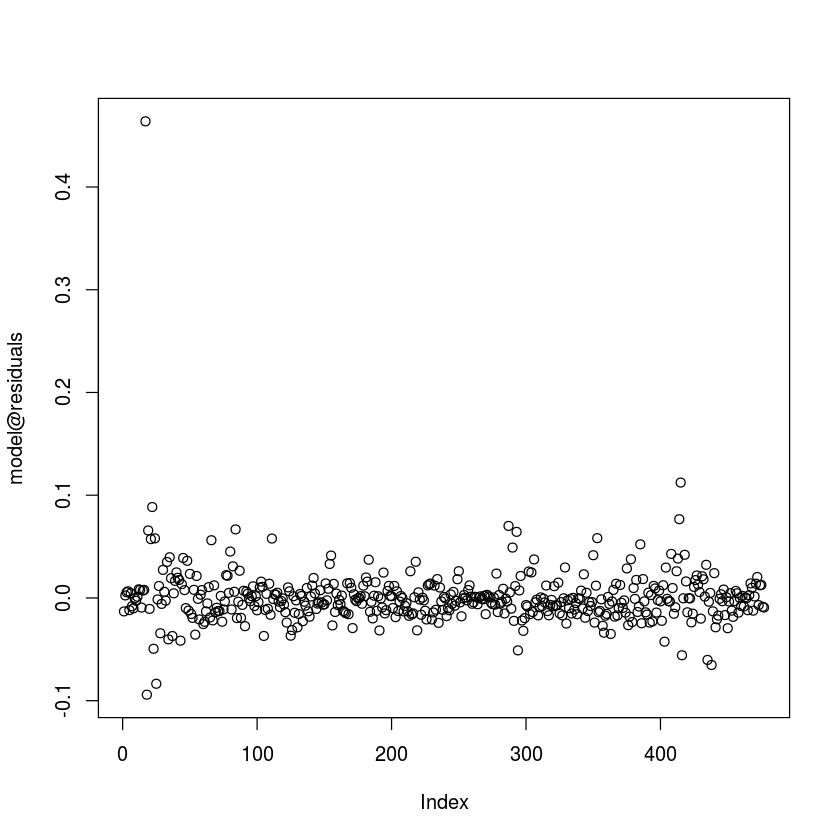

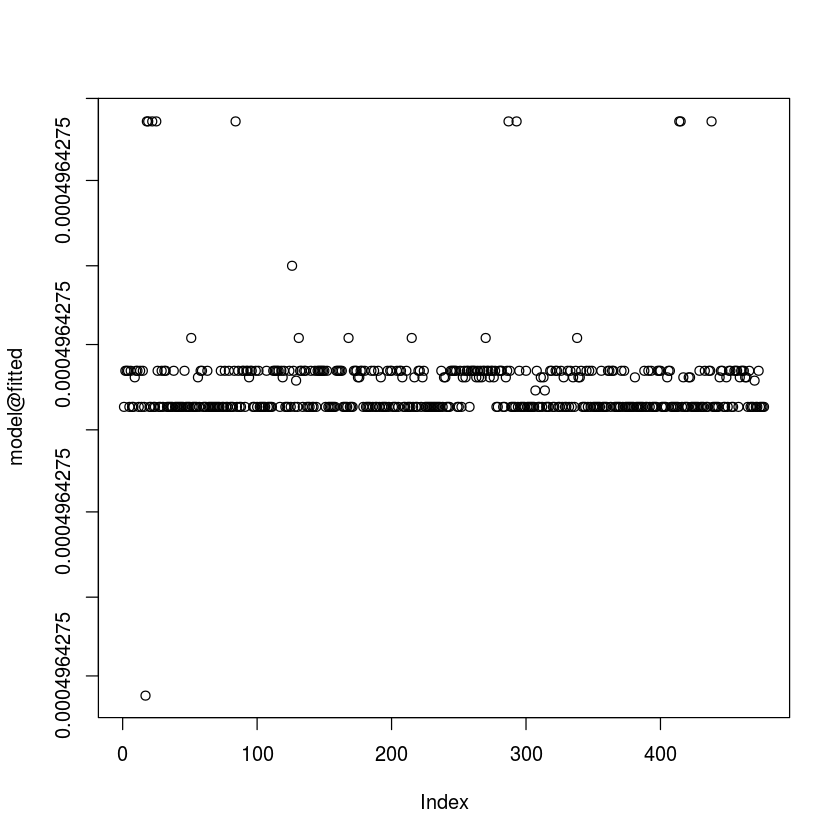

In [43]:
garch(coredata(Part2))
model <- garchFit(formula=~garch(1,1), data=coredata(Part2))
plot(model@residuals, with ="lines")
plot(model@fitted, with ="lines")

#  Apply the decompose function to the logReturn and keep the residuals 

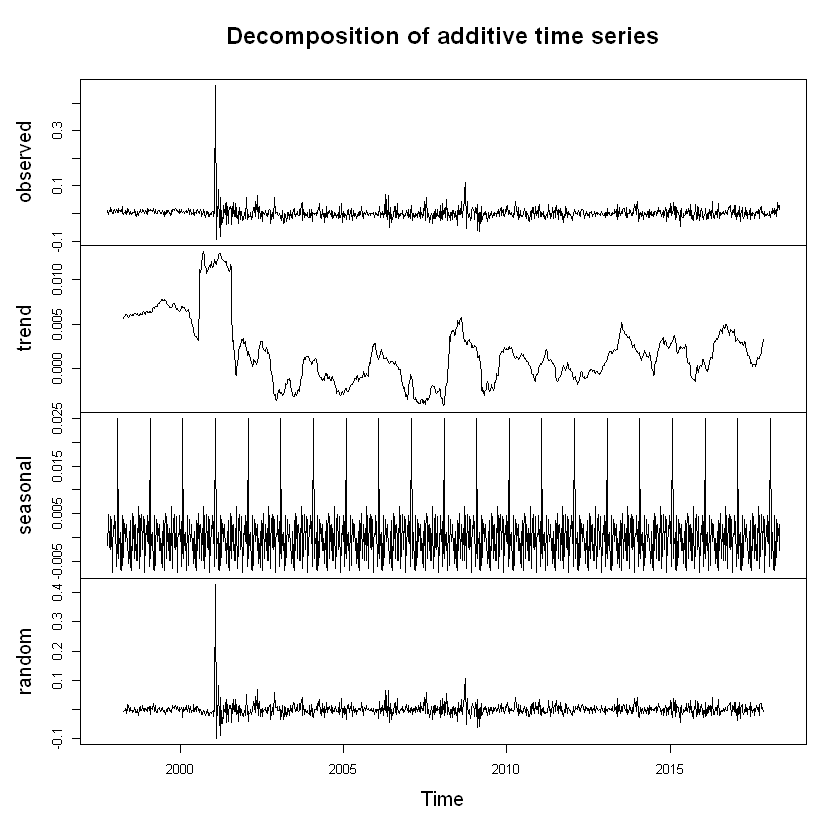

In [287]:
decomp <- decompose(ts(coredata(logReturn), start=c(1997,41), end = c(2018,20),frequency = 52)) 
plot(decomp)
residuals.decom <- na.omit(decomp$random)

# Apply the ARIMA to the residuals from the decompose funct.

In [288]:
library(forecast)
model <- auto.arima(residuals.decom)
model
residuals.arima <- residuals(model)

Series: residuals.decom 
ARIMA(1,0,0)(0,0,2)[52] with zero mean 

Coefficients:
          ar1     sma1     sma2
      -0.1602  -0.1121  -0.0652
s.e.   0.0309   0.0315   0.0323

sigma^2 estimated as 0.000448:  log likelihood=2486.01
AIC=-4964.03   AICc=-4963.99   BIC=-4944.32

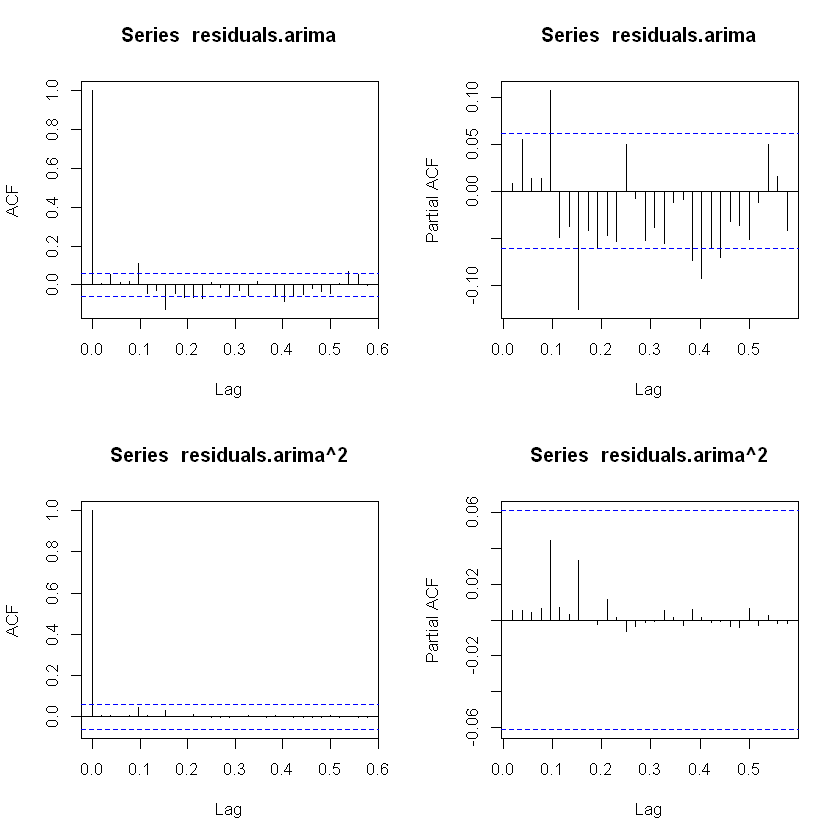

In [294]:
par(mfrow=c(2,2))
acf(residuals.arima)
pacf(residuals.arima)
acf(residuals.arima^2)
pacf(residuals.arima^2)

In [304]:
var.mont <- xts(apply.monthly(logReturn,var), oreder.by=format(index(apply.monthly(logReturn,var)), tryFormat=c("%Y-%m")))
dimnames(var.mont)[2] <- "VarianceMont"
head(var.mont)

           VarianceMont
1997-10-31 9.443767e-05
1997-11-28 1.208886e-04
1997-12-31 2.161407e-05
1998-01-29 4.236142e-05
1998-02-27 5.044989e-05
1998-03-27 7.441738e-06

In [317]:
#install.packages("aTSA", repos= "https://cran.us.r-project.org")
library(aTSA)
arch.test(arima())

ERROR: Error in arch.test(model): 'object' should be 'Arima' or 'estimate' class estimated 
         from arima() or estimate()


In [234]:
part1 <- window(logreturn, start= "1997-10-24", end ="2000-12-25")
part2 <- window(logreturn, start= "2001-05-05", end ="2011-12-30")
part3 <- window(logreturn, start= "2012-01-06", end ="2018-07-20")

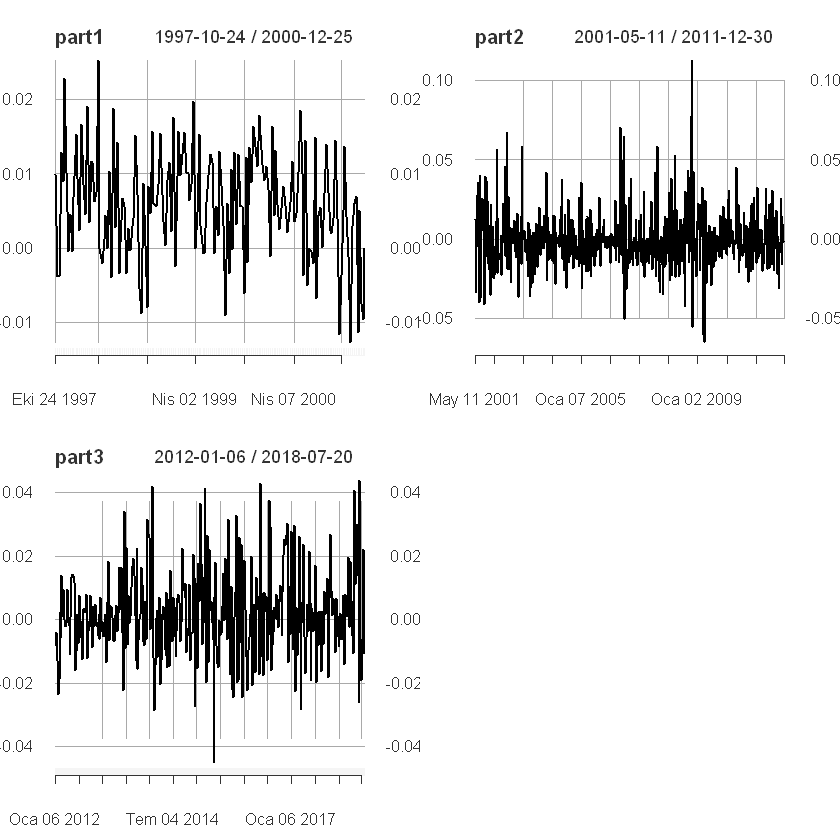

In [235]:
par(mfrow=c(2,2))
plot(part1)
plot(part2)
plot(part3)

In [179]:
par(mfrow=c(2,2))
hist(weeklydata$weekly.Open, freq=TRUE, main="Distribution of Dates by Month", col="slateblue1", xlab="")
hist(weeklydata$weekly.High)
hist(weeklydata$weekly.Close)
hist(weeklydata$weekly.Low)

ERROR: Error in hist.default(weeklydata$weekly.Open, freq = TRUE, main = "Distribution of Dates by Month", : 'x' must be numeric


In [97]:
stl(timelog, s.window = 0)

ERROR: Error in stl(timelog, s.window = 0): series is not periodic or has less than two periods
